In [1]:
%matplotlib inline

In [2]:
import numpy as np  # library for manipulating arrays
import pylab as pl  # library for making plots
import cv2          # OpenCV library

Create a fake image with a step change:

In [3]:
fakeimage = np.zeros((128,128))
fakeimage[31:96,31:96] = 10.0

Plot the fake shape to see how it looks:

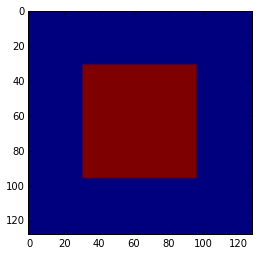

In [4]:
pl.subplot(111)
pl.imshow(fakeimage)
pl.show()

Add some Gaussian noise. I'm adding noise with a mean of zero and a standard deviation of 0.01. This function creates one realisation of this noise and adds it to our fake image:

In [5]:
fakeimage+=np.random.normal(0,0.02,size=(128,128))

Plot the noisy shape to see how it looks. (The noise is small compared to the amplitude of the structure so it doesn't look very different)

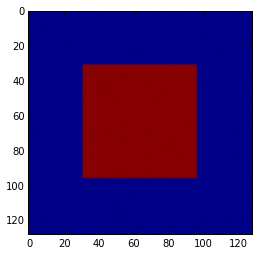

In [6]:
pl.subplot(111)
pl.imshow(fakeimage)
pl.imsave("image.png",fakeimage)
pl.show()

Then we detect an edge. 

I'm using Canny edge detection to find the edge of the shadow: https://docs.opencv.org/3.3.1/da/d22/tutorial_py_canny.html

I haven't tuned it very finely, so it's not particularly brilliant... it sounds like you algorithm works better, so you should replace this bit.

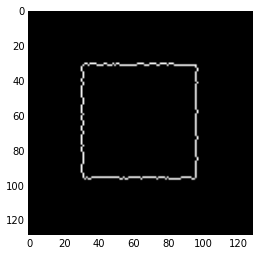

In [7]:
img= cv2.imread('image.png',0)

# Use Otsu filtering to determine thresholds for finding the edge:
high_thresh, thresh_im = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
low_thresh = 0.9*high_thresh

# find the edges using Canny method:
edges = cv2.Canny(img,low_thresh,high_thresh)

# plot the output:
pl.plot(1),pl.imshow(edges,cmap = 'gray')
pl.show()

To make multiple noise realisations we need to make a loop. This will output $N_{\rm real}$ images, each with the same underlying pattern but a different realisation of noise from the same Gaussian distribution.

In [8]:
n_real = 100 # number of realisations

In [9]:
for i in range(0,n_real):
    
    # same underlying pattern:
    fakeimage = np.zeros((128,128))
    fakeimage[31:96,31:96] = 10.0
    
    # add a new noise realisation:
    fakeimage+=np.random.normal(0,0.02,size=(128,128))
    
    # save it to an image:
    pl.imsave("image_"+str(i)+".png",fakeimage)

Then we fit the edges for each of the realisations sparately and combine the output:

In [10]:
all_edges = np.zeros(edges.shape)
for i in range(0,n_real):

    img= cv2.imread('image_'+str(i)+'.png',0)

    # Use Otsu filtering to determine thresholds for finding the edge:
    high_thresh, thresh_im = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    low_thresh = 0.9*high_thresh

    # find the edges using Canny method:
    edges = cv2.Canny(img,low_thresh,high_thresh)
    
    all_edges+=edges

The combined output shows the distribution of fitted values:

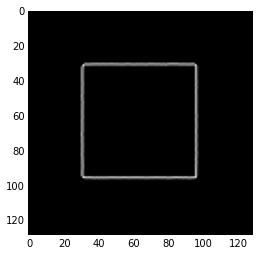

In [11]:
# plot the output:
pl.plot(1),pl.imshow(all_edges,cmap = 'gray')
pl.show()

If we zoom in on this plot we can see that the spread in fitted edges is only 2 pixels wide. This is dependent on (1) the noise level and (2) the fitting method. So the number may be different for your code, but you can use the same basic method.